<a href="https://colab.research.google.com/github/saramach/ucsd_deep_neural_networks/blob/master/UCSD_TF_Assignment_3_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
tf.random.set_seed(2)


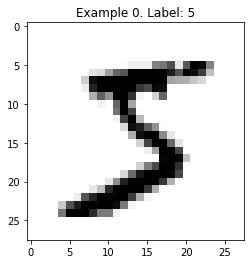

In [32]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(len(x_train), 28, 28,1)
x_test = x_test.reshape(len(x_test), 28, 28,1)
x_test.shape
def display_image(position):
    image = x_train[position].squeeze()
    plt.title('Example %d. Label: %d' % (position, y_train[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)
display_image(0)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (3,3), activation='sigmoid', input_shape=(28, 28,1)),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(16, (3,3), activation='sigmoid'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32,activation = 'sigmoid'),
  tf.keras.layers.Dense(32,activation = 'sigmoid'),
  tf.keras.layers.Dense(32,activation = 'sigmoid'),
  tf.keras.layers.Dense(32,activation = 'sigmoid'),
  tf.keras.layers.Dense(32,activation = 'sigmoid'),
  tf.keras.layers.Dense(32,activation = 'sigmoid'),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_8 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_9 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                12832     
_________________________________________________________________
dense_29 (Dense)             (None, 32)               

In [35]:
model.fit(x_train, y_train, epochs=5, verbose=2)



Train on 60000 samples
Epoch 1/5
60000/60000 - 24s - loss: 1.9957 - accuracy: 0.2161
Epoch 2/5
60000/60000 - 23s - loss: 1.0495 - accuracy: 0.5986
Epoch 3/5
60000/60000 - 23s - loss: 0.4974 - accuracy: 0.8633
Epoch 4/5
60000/60000 - 24s - loss: 0.3235 - accuracy: 0.9162
Epoch 5/5
60000/60000 - 23s - loss: 0.2608 - accuracy: 0.9320


In [29]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 2s - loss: 0.2285 - accuracy: 0.9417


[0.22848183022737503, 0.9417]